#Criando dados Ficticios de Vendas

## instalando o Faker

In [ ]:
!pip install faker

In [ ]:
import pandas as pd
from faker import Faker
import random
from random import randint
from datetime import timedelta

# Inicializando o gerador de dados fictícios para o Brasil
fake = Faker('pt_BR')

# Definindo o número de linhas
num_linhas = 30000

# Lista de cidades da região Sudeste do Brasil
cidades_sudeste = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Vitória', 'Campinas', 'Santos', 'Niterói', 'Sorocaba', 'Juiz de Fora', 'Uberlândia']

# Lista de produtos
produtos = [
    "Batom Vegan Yara - Terra Cobre",
    "Máscara Vegan Yara - Vento Preto",
    "Base Líquida Vegan Yara - Terra Natural",
    "Corretivo Vegan Yara - Nuvem Clara",
    "Blush Vegan Yara - Fogo Coral",
    "Pó Compacto Vegan Yara - Terra Bronzeada",
    "Delineador Vegan Yara - Vento Preto",
    "Sombra Vegan Yara - Terra Neutra",
    "Batom Líquido Vegan Yara - Fogo Vermelho",
    "Primer Vegan Yara - Vento Matte",
    "BB Cream Vegan Yara - Terra Média",
    "Iluminador Vegan Yara - Fogo Dourado",
    "Contorno Vegan Yara - Terra Suave",
    "Esfoliante Facial Vegan Yara - Água de Chá Verde",
    "Hidratante Facial Vegan Yara - Água de Aloe Vera",
    "Protetor Solar Vegan Yara - Terra FPS 50",
    "Demaquilante Vegan Yara - Água Suave",
    "Sabonete Facial Vegan Yara - Água Profunda",
    "Tônico Facial Vegan Yara - Vento Refrescante",
    "Sérum Facial Vegan Yara - Fogo de Vitamina C",
    "Perfume Vegan Yara - Terra Amadeirada",
    "Perfume Vegan Yara - Vento Fresco",
    "Perfume Vegan Yara - Fogo Picante",
    "Perfume Vegan Yara - Água de Coco",
    "Perfume Vegan Yara - Terra e Mar",
    "Flora Noir Vegan Yara",
    "Floresta Negra Vegan Yara"
]

# Produtos mais vendidos
produtos_mais_vendidos = ["Flora Noir Vegan Yara", "Floresta Negra Vegan Yara"]

# Gerando dados fictícios
dados = {
    "quantidade": [randint(1, 100) for _ in range(num_linhas)],
    "preço": [],
    "custo": [],
    "vendedor": [fake.name() for _ in range(num_linhas)],
    "cliente": [fake.name() for _ in range(num_linhas)],
    "pedido": [],
    "produto": [],
    "filial": [random.choice(cidades_sudeste) for _ in range(num_linhas)],
    "cidade_entrega": [random.choice(cidades_sudeste) for _ in range(num_linhas)],
    "data_venda": [],
    "data_entrega": [],
}

# Gerando números de pedidos únicos
pedidos = list(range(1000, 1000 + num_linhas))
random.shuffle(pedidos)

for _ in range(num_linhas):
    # Garantindo que o custo seja sempre menor que o dobro do preço
    custo = round(random.uniform(5.5, 50.5), 2)
    preço = round(random.uniform(custo, 2 * custo), 2)
    dados["custo"].append(custo)
    dados["preço"].append(preço)

    # Garantindo que a data de entrega seja sempre dentro de 60 dias após a data de venda
    data_venda = fake.date_between(start_date='-1y', end_date='today')
    data_entrega = data_venda + timedelta(days=randint(1, 60))
    dados["data_venda"].append(data_venda)
    dados["data_entrega"].append(data_entrega)

    # Adicionando número de pedido único
    dados["pedido"].append(pedidos[_])

    # Selecionando produto, com maior chance para os produtos mais vendidos
    if random.random() < 0.2:  # 20% de chance de ser um produto mais vendido
        produto = random.choice(produtos_mais_vendidos)
    else:
        produto = random.choice(produtos)
    dados["produto"].append(produto)

# Criando um DataFrame com os dados
df = pd.DataFrame(dados)
df.head()

,quantidade,preço,custo,vendedor,cliente,pedido,produto,filial,cidade_entrega,data_venda,data_entrega
0,19,24.29,19.06,Gabriela Rocha,Ana Laura Dias,26246,Floresta Negra Vegan Yara,Uberlândia,São Paulo,2023-11-26,2024-01-14
1,95,45.28,28.40,Dra. Zoe Moreira,Srta. Heloisa Novais,1733,Sabonete Facial Vegan Yara - Água Profunda,Campinas,Belo Horizonte,2023-12-23,2024-01-16
2,93,53.27,47.88,Lavínia Cardoso,Luiz Otávio Almeida,10315,Floresta Negra Vegan Yara,Niterói,São Paulo,2024-06-10,2024-07-12
3,1,44.33,42.55,Benício das Neves,Gustavo Aragão,14833,Flora Noir Vegan Yara,Juiz de Fora,Niterói,2023-12-04,2024-01-27
4,34,9.15,5.55,Laís Costa,Vicente Viana,9568,Floresta Negra Vegan Yara,Campinas,Uberlândia,2023-10-13,2023-11-29


#Gerando Excel das Vendas

In [ ]:
df.to_excel('dados.xlsx', index=False)

# Importando o modulo files do Colab
from google.colab import files

#Efetuando o download do arquivo
files.download('dados.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Importando Dados de Vendas

In [71]:
dfVendas = pd.read_excel('dados.xlsx')
dfVendas.head()

,quantidade,preço,custo,vendedor,cliente,pedido,produto,filial,cidade_entrega,data_venda,data_entrega
0,19,24.29,19.06,Gabriela Rocha,Ana Laura Dias,26246,Floresta Negra Vegan Yara,Uberlândia,São Paulo,2023-11-26,2024-01-14
1,95,45.28,28.40,Dra. Zoe Moreira,Srta. Heloisa Novais,1733,Sabonete Facial Vegan Yara - Água Profunda,Campinas,Belo Horizonte,2023-12-23,2024-01-16
2,93,53.27,47.88,Lavínia Cardoso,Luiz Otávio Almeida,10315,Floresta Negra Vegan Yara,Niterói,São Paulo,2024-06-10,2024-07-12
3,1,44.33,42.55,Benício das Neves,Gustavo Aragão,14833,Flora Noir Vegan Yara,Juiz de Fora,Niterói,2023-12-04,2024-01-27
4,34,9.15,5.55,Laís Costa,Vicente Viana,9568,Floresta Negra Vegan Yara,Campinas,Uberlândia,2023-10-13,2023-11-29


In [72]:
dfVendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   quantidade      30000 non-null  int64         
 1   preço           30000 non-null  float64       
 2   custo           30000 non-null  float64       
 3   vendedor        30000 non-null  object        
 4   cliente         30000 non-null  object        
 5   pedido          30000 non-null  int64         
 6   produto         30000 non-null  object        
 7   filial          30000 non-null  object        
 8   cidade_entrega  30000 non-null  object        
 9   data_venda      30000 non-null  datetime64[ns]
 10  data_entrega    30000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 2.5+ MB


In [73]:
dfVendas.describe()

,quantidade,preço,custo,pedido,data_venda,data_entrega
count,30000.000000,30000.000000,30000.000000,30000.000000,30000,30000
mean,50.656167,41.736666,27.866422,15999.500000,2023-12-10 09:49:09.119999744,2024-01-09 22:06:28.800000
min,1.000000,5.660000,5.500000,1000.000000,2023-06-11 00:00:00,2023-06-12 00:00:00
25%,26.000000,23.970000,16.690000,8499.750000,2023-09-11 00:00:00,2023-10-11 00:00:00
50%,51.000000,39.950000,27.740000,15999.500000,2023-12-10 00:00:00,2024-01-10 00:00:00
75%,76.000000,56.810000,39.100000,23499.250000,2024-03-10 00:00:00,2024-04-09 00:00:00
max,100.000000,100.800000,50.500000,30999.000000,2024-06-10 00:00:00,2024-08-09 00:00:00
std,28.806413,21.340547,12.983313,8660.398374,NaN,NaN


In [74]:
dfVendas.dtypes

quantidade                 int64
preço                    float64
custo                    float64
vendedor                  object
cliente                   object
pedido                     int64
produto                   object
filial                    object
cidade_entrega            object
data_venda        datetime64[ns]
data_entrega      datetime64[ns]
dtype: object

#Calculando novas colunas

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Custo total do pedido

In [76]:
dfVendas['Custo Total'] = dfVendas['custo'] * dfVendas['quantidade']
dfVendas['Custo Total'].head()

0     362.14
1    2698.00
2    4452.84
3      42.55
4     188.70
Name: Custo Total, dtype: float64

##Valor de Venda do Pedido

In [77]:
dfVendas['Valor de Venda'] = dfVendas['preço'] * dfVendas['quantidade']
dfVendas['Valor de Venda'].head()

0     461.51
1    4301.60
2    4954.11
3      44.33
4     311.10
Name: Valor de Venda, dtype: float64

##Lucro do Pedido

In [78]:
dfVendas['Lucro'] = dfVendas['Valor de Venda'] - dfVendas['Custo Total']
dfVendas['Lucro'].head()

0      99.37
1    1603.60
2     501.27
3       1.78
4     122.40
Name: Lucro, dtype: float64

#Agrupando Dados

In [79]:
print('\nVendas Por Vendedor')
VendasPorVendedor = dfVendas.groupby('vendedor')['Valor de Venda'].sum()
VendasPorVendedor


Vendas Por Vendedor


vendedor
Agatha Abreu          6078.47
Agatha Albuquerque    6201.85
Agatha Aragão         3142.10
Agatha Azevedo        1606.59
Agatha Barros          181.38
                       ...   
Ísis da Mota           713.28
Ísis da Paz           5917.95
Ísis da Rocha         3005.49
Ísis da Rosa           862.80
Ísis das Neves         111.78
Name: Valor de Venda, Length: 21469, dtype: float64

In [80]:
print('\nLucro Por Vendedor')
LucroPorVendedor = dfVendas.groupby('vendedor')['Lucro'].sum()
LucroPorVendedor


Lucro Por Vendedor


vendedor
Agatha Abreu          2128.68
Agatha Albuquerque    1741.50
Agatha Aragão         1047.15
Agatha Azevedo         416.22
Agatha Barros           56.10
                       ...   
Ísis da Mota           331.36
Ísis da Paz           2732.91
Ísis da Rocha         1305.57
Ísis da Rosa           244.32
Ísis das Neves           9.72
Name: Lucro, Length: 21469, dtype: float64

#Formatando Dados

In [81]:
# Definindo a formatação da moeda
moeda_brasileira = "R$ {:,.2f}"

In [82]:
VendasPorVendedor = VendasPorVendedor.apply(lambda x: moeda_brasileira.format(x))
VendasPorVendedor

vendedor
Agatha Abreu          R$ 6,078.47
Agatha Albuquerque    R$ 6,201.85
Agatha Aragão         R$ 3,142.10
Agatha Azevedo        R$ 1,606.59
Agatha Barros           R$ 181.38
                         ...     
Ísis da Mota            R$ 713.28
Ísis da Paz           R$ 5,917.95
Ísis da Rocha         R$ 3,005.49
Ísis da Rosa            R$ 862.80
Ísis das Neves          R$ 111.78
Name: Valor de Venda, Length: 21469, dtype: object

#Gerando Gráficos

In [83]:
# Importando biblioteca de gráficos
import matplotlib.pyplot as plt

In [84]:
# Primeiro, certifique-se de que 'data_venda' é do tipo datetime
dfVendas['data_venda'] = pd.to_datetime(dfVendas['data_venda'])

# Crie uma nova coluna 'mes' que representa o mês de cada venda
dfVendas['mes'] = dfVendas['data_venda'].dt.month

# Agora, agrupe por 'mes' e some 'Valor de Venda'
VendasPorMes = dfVendas.groupby('mes')['Valor de Venda'].sum()
VendasPorMes



mes
1     5534232.07
2     5284379.19
3     5228920.64
4     4918387.87
5     5410033.86
6     5069215.76
7     5154550.78
8     5359223.21
9     5414823.74
10    5741661.81
11    5467283.40
12    5115268.84
Name: Valor de Venda, dtype: float64

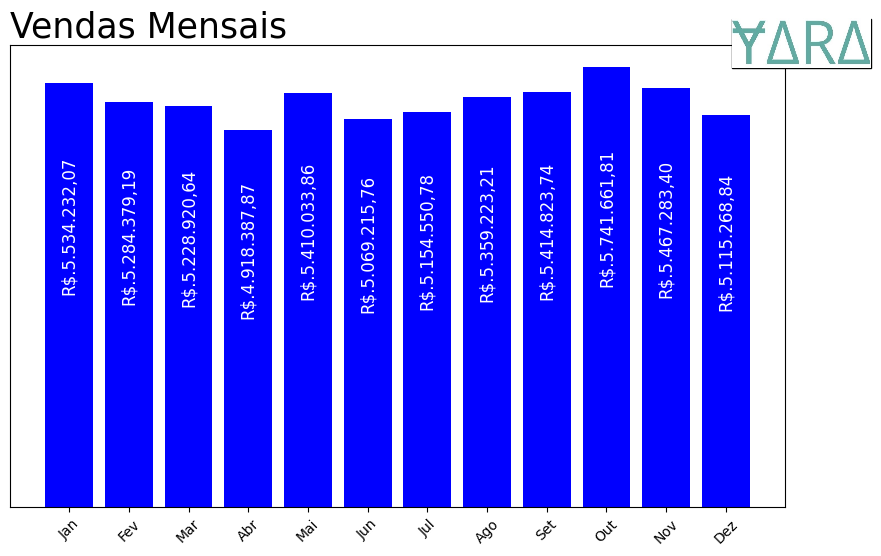

In [85]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Dados de exemplo
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.figure(figsize=(10,6))
barras = plt.bar(meses, VendasPorMes, color='blue')

# Adiciona a logo
logo = mpimg.imread('logo.jpg') # Substitua 'caminho_para_sua_logo.png' pelo caminho real para o arquivo da sua logo
imagebox = OffsetImage(logo, zoom=0.2) # Ajuste o valor de 'zoom' para alterar o tamanho da logo
ab = AnnotationBbox(imagebox, (1.02, 1), xycoords='axes fraction', boxcoords="offset points", pad=0)
plt.gca().add_artist(ab)

# Adiciona rótulos às barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval/2, moeda_brasileira.format(yval).replace(',', ' ').replace('.', ',').replace(' ', '.'), ha='center', va='bottom', rotation=90, color='white', size=12)

plt.title('Vendas Mensais', loc='left',size=25) # Posiciona o título à esquerda
# removendo a poluição visual
plt.xlabel('') # Remove a legenda do rótulo pois o Proprio Rotulo é objetivo se referenciando a Mês
plt.ylabel('') # Remove a legenda da escala pois o Proprio Valor já esta formatado como R$ e o titulo se refere a venda
plt.yticks([]) # Remove a escala de valores
plt.xticks(rotation=45) # Rotaciona os rótulos dos meses

plt.show()


# Filtrando Dados

In [86]:
produtoFiltro = dfVendas[dfVendas['produto'] == 'Flora Noir Vegan Yara']
produtoFiltro.head()

,quantidade,preço,custo,vendedor,cliente,pedido,produto,filial,cidade_entrega,data_venda,data_entrega,Custo Total,Valor de Venda,Lucro,mes
3,1,44.33,42.55,Benício das Neves,Gustavo Aragão,14833,Flora Noir Vegan Yara,Juiz de Fora,Niterói,2023-12-04,2024-01-27,42.55,44.33,1.78,12
7,52,59.40,43.96,Guilherme Ramos,Maria Sophia Porto,24301,Flora Noir Vegan Yara,Santos,Santos,2024-02-15,2024-03-25,2285.92,3088.80,802.88,2
8,23,31.78,21.88,Apollo Azevedo,Otto Cavalcante,3373,Flora Noir Vegan Yara,Sorocaba,Uberlândia,2024-06-05,2024-07-28,503.24,730.94,227.70,6
9,49,45.42,37.92,Luigi Ramos,Gael Campos,20231,Flora Noir Vegan Yara,Niterói,Rio de Janeiro,2024-04-12,2024-04-28,1858.08,2225.58,367.50,4
10,48,24.06,18.57,Lara da Costa,Dr. Pedro Lucas Abreu,12784,Flora Noir Vegan Yara,Uberlândia,Belo Horizonte,2023-12-07,2024-02-03,891.36,1154.88,263.52,12


In [87]:
# Filtre os dados para analisar apenas as vendas de um determinado produto
produtoFiltro = input('Informe o produto que deseja consultar: ')
vendas_filtradas = dfVendas[(dfVendas['produto'] == produtoFiltro)]
vendas_filtradas.head()

Informe o produto que deseja consultar: Flora Noir Vegan Yara


,quantidade,preço,custo,vendedor,cliente,pedido,produto,filial,cidade_entrega,data_venda,data_entrega,Custo Total,Valor de Venda,Lucro,mes
3,1,44.33,42.55,Benício das Neves,Gustavo Aragão,14833,Flora Noir Vegan Yara,Juiz de Fora,Niterói,2023-12-04,2024-01-27,42.55,44.33,1.78,12
7,52,59.40,43.96,Guilherme Ramos,Maria Sophia Porto,24301,Flora Noir Vegan Yara,Santos,Santos,2024-02-15,2024-03-25,2285.92,3088.80,802.88,2
8,23,31.78,21.88,Apollo Azevedo,Otto Cavalcante,3373,Flora Noir Vegan Yara,Sorocaba,Uberlândia,2024-06-05,2024-07-28,503.24,730.94,227.70,6
9,49,45.42,37.92,Luigi Ramos,Gael Campos,20231,Flora Noir Vegan Yara,Niterói,Rio de Janeiro,2024-04-12,2024-04-28,1858.08,2225.58,367.50,4
10,48,24.06,18.57,Lara da Costa,Dr. Pedro Lucas Abreu,12784,Flora Noir Vegan Yara,Uberlândia,Belo Horizonte,2023-12-07,2024-02-03,891.36,1154.88,263.52,12


In [88]:
# Filtre parte da string do Produto
produtoFiltroParte = input('Informe o produto ou parte do texto que deseja consultar: ').upper() # lower()
dfVendas['ProdutoUpper'] = dfVendas['produto'].str.upper()
vendas_filtradasParte = dfVendas[(dfVendas['ProdutoUpper'].str.contains(produtoFiltroParte))]
vendas_filtradasParte.head()

Informe o produto ou parte do texto que deseja consultar: Perfume


,quantidade,preço,custo,vendedor,cliente,pedido,produto,filial,cidade_entrega,data_venda,data_entrega,Custo Total,Valor de Venda,Lucro,mes,ProdutoUpper
12,75,39.28,25.08,Liam Carvalho,Josué Guerra,7846,Perfume Vegan Yara - Terra Amadeirada,São Paulo,Sorocaba,2023-10-13,2023-10-29,1881.00,2946.00,1065.00,10,PERFUME VEGAN YARA - TERRA AMADEIRADA
18,56,73.42,41.99,Thomas Gomes,Nicole Peixoto,26927,Perfume Vegan Yara - Fogo Picante,Belo Horizonte,Campinas,2023-11-28,2024-01-25,2351.44,4111.52,1760.08,11,PERFUME VEGAN YARA - FOGO PICANTE
19,18,56.03,40.33,Larissa Carvalho,Maria Júlia Porto,17462,Perfume Vegan Yara - Vento Fresco,Uberlândia,Sorocaba,2023-12-31,2024-02-15,725.94,1008.54,282.60,12,PERFUME VEGAN YARA - VENTO FRESCO
23,12,82.66,44.89,Paulo Peixoto,Leonardo Garcia,19605,Perfume Vegan Yara - Água de Coco,Vitória,Juiz de Fora,2023-11-23,2024-01-17,538.68,991.92,453.24,11,PERFUME VEGAN YARA - ÁGUA DE COCO
30,40,58.80,32.45,Enrico Fonseca,Rhavi Cavalcanti,19024,Perfume Vegan Yara - Fogo Picante,Rio de Janeiro,Rio de Janeiro,2023-12-17,2024-01-19,1298.00,2352.00,1054.00,12,PERFUME VEGAN YARA - FOGO PICANTE


# Produtos mais vendidos

In [89]:
produto_mais_vendido = dfVendas.groupby('produto')['quantidade'].sum().idxmax()
print(f'Produto mais vendido em quantidade é: {produto_mais_vendido}')

Produto mais vendido em quantidade é: Floresta Negra Vegan Yara


In [91]:
produtos_selecionados = ['Flora Noir Vegan Yara', 'Floresta Negra Vegan Yara']

df_filtrado = dfVendas[dfVendas['produto'].isin(produtos_selecionados)]
df_filtrado.head()


,quantidade,preço,custo,vendedor,cliente,pedido,produto,filial,cidade_entrega,data_venda,data_entrega,Custo Total,Valor de Venda,Lucro,mes,ProdutoUpper
0,19,24.29,19.06,Gabriela Rocha,Ana Laura Dias,26246,Floresta Negra Vegan Yara,Uberlândia,São Paulo,2023-11-26,2024-01-14,362.14,461.51,99.37,11,FLORESTA NEGRA VEGAN YARA
2,93,53.27,47.88,Lavínia Cardoso,Luiz Otávio Almeida,10315,Floresta Negra Vegan Yara,Niterói,São Paulo,2024-06-10,2024-07-12,4452.84,4954.11,501.27,6,FLORESTA NEGRA VEGAN YARA
3,1,44.33,42.55,Benício das Neves,Gustavo Aragão,14833,Flora Noir Vegan Yara,Juiz de Fora,Niterói,2023-12-04,2024-01-27,42.55,44.33,1.78,12,FLORA NOIR VEGAN YARA
4,34,9.15,5.55,Laís Costa,Vicente Viana,9568,Floresta Negra Vegan Yara,Campinas,Uberlândia,2023-10-13,2023-11-29,188.70,311.10,122.40,10,FLORESTA NEGRA VEGAN YARA
6,47,41.43,29.19,Maria Flor Ribeiro,Heloisa Moura,25013,Floresta Negra Vegan Yara,Vitória,Sorocaba,2024-01-07,2024-01-23,1371.93,1947.21,575.28,1,FLORESTA NEGRA VEGAN YARA


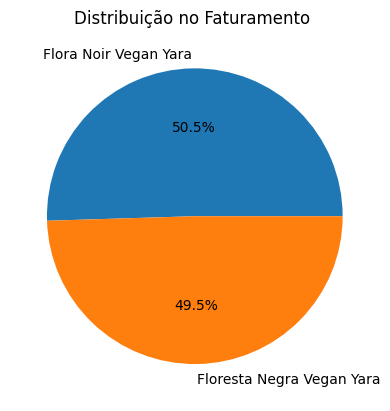

In [116]:
df_filtrado.groupby('produto')['Valor de Venda'].sum().plot.pie(title='Distribuição no Faturamento ', autopct='%1.1f%%', subplots=False, ylabel='',legend=False)

plt.show()